In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Clean_Day_0_data.csv", index_col=0, parse_dates=True)
df = df.sort_index()
df["P x V"] = df["Volume"] * df["Real Price"]
df

,Volume,Real Price,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,P x V
combined_time,,,,,,,
2025-01-02 08:00:00,NaN,NaN,[1 6],NaN,NaN,NaN,NaN
2025-01-02 08:00:01,NaN,NaN,[261 1],[800 1][799 1][798 1][797 1],NaN,[800 1][799 1][798 1],NaN
2025-01-02 08:00:02,NaN,NaN,[262 6],[338 3][297 5],[1 6],NaN,NaN
2025-01-02 08:00:03,NaN,NaN,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],NaN
2025-01-02 08:00:04,NaN,NaN,NaN,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,NaN,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,NaN
...,...,...,...,...,...,...,...
2025-01-02 16:29:55,0.0,NaN,[284 2][275 1] [274 1][270 1][285 2][267 1][15...,[336 5][406 5][401 5][344 5][486 3][295 6],[283 2][275 2][133 9][275 1][284 2][270 1][72 1],[446 4][614 5][336 5][406 5][761 3][295 5],NaN
2025-01-02 16:29:56,1.0,286.0,[272 1][267 5][176 1][66 2][217 1][276 4],[295 3][459 5][492 5][296 1],[274 1][268 4] [267 1][285 2][159 1][176 1][28...,[295 6][344 5][286 1][459 5],286.0
2025-01-02 16:29:57,0.0,NaN,[65 5][80 4][277 1][276 8][269 1] [267 4][278 ...,[290 5][291 2] [295 1][789 5][496 3][290 2][28...,[262 5][276 4] [80 4][267 5][277 1][65 5][66 2...,[492 5][295 3][290 5][486 3][291 2][290 2][496...,NaN


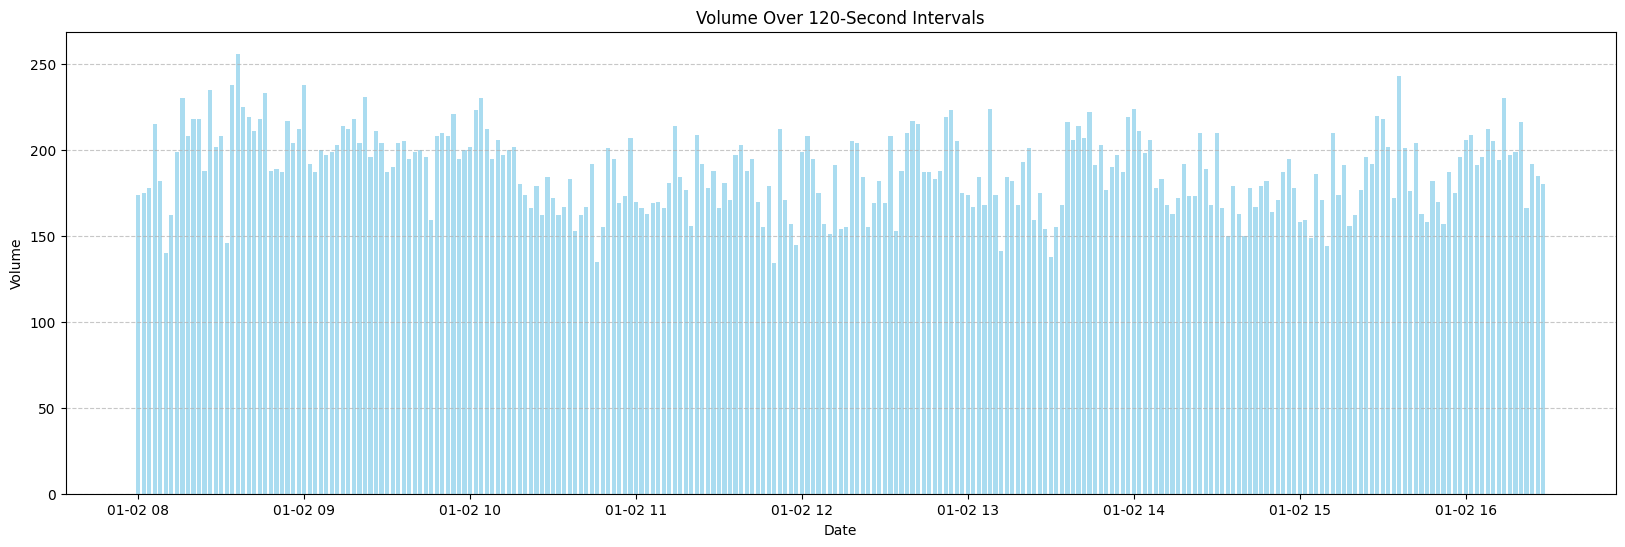

In [3]:
X_seconds = 60 * 2 # change this as you please
df_resampled = df.resample(f'{X_seconds}s').sum() 

plt.figure(figsize=(20, 6))
plt.bar(df_resampled.index, df_resampled["Volume"], color="skyblue", alpha=0.7, width=X_seconds/(60*60*32))
plt.title(f"Volume Over {X_seconds}-Second Intervals")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

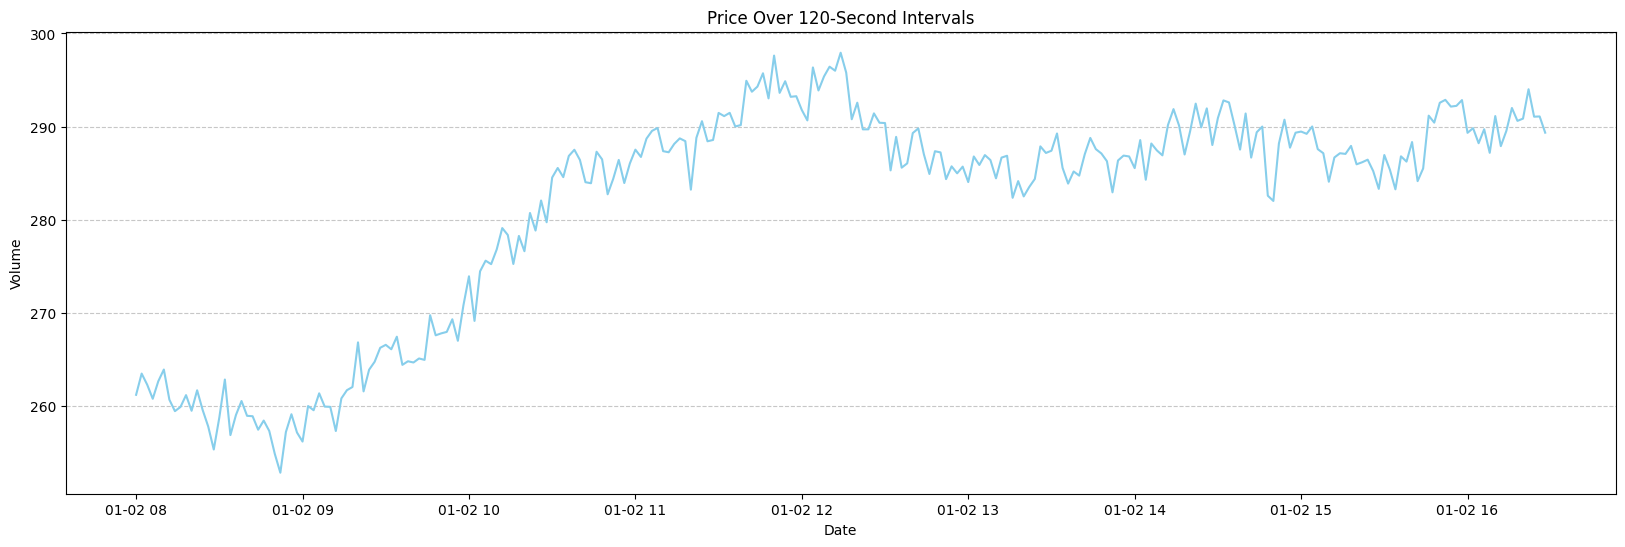

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(df_resampled.index, df_resampled["P x V"] / df_resampled["Volume"], color="skyblue")
plt.title(f"Price Over {X_seconds}-Second Intervals")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [5]:
import ast

def parse(val):
    if type(val) == str:
        test = val.replace(" ",",").replace("][","],[").replace("]0[","],[")
        list_ = ast.literal_eval("["+test+"]")
        if type(list_[0]) != list:
            return np.nan
        out = []
        for val in list_:
            for i in range(val[1]):
                out.append(val[0])

        return np.array(out)
    else:
        return np.nan

In [6]:
depth_ask_i = df_resampled["Incoming ask"].apply(parse)
depth_bid_i = df_resampled["Incoming bid"].apply(parse)
depth_ask_o = df_resampled["Outgoing ask"].apply(parse)
depth_bid_o = df_resampled["Outgoing bid"].apply(parse)

[249 249 249 ... 137 137 137]


C:\Users\wwden\AppData\Local\Temp\ipykernel_28276\3852775257.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hist, edges = np.histogram(depth_ask_i[t], range = (0,1000), bins = 1000)
C:\Users\wwden\AppData\Local\Temp\ipykernel_28276\3852775257.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hist, edges = np.histogram(depth_bid_i[t], range = (0,1000), bins = 1000)
C:\Users\wwden\AppData\Local\Temp\ipykernel_28276\3852775257.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

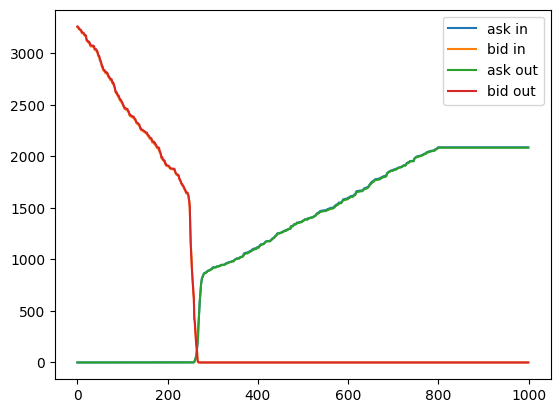

In [7]:
t = 1

hist, edges = np.histogram(depth_ask_i[t], range = (0,1000), bins = 1000)
cumulative_hist = np.cumsum(hist) 
plt.plot(edges[:-1], cumulative_hist, label = "ask in")

hist, edges = np.histogram(depth_bid_i[t], range = (0,1000), bins = 1000)
cumulative_hist = np.cumsum(hist) 
plt.plot(edges[:-1], max(cumulative_hist) - cumulative_hist, label = "bid in")

hist, edges = np.histogram(depth_ask_o[t], range = (0,1000), bins = 1000)
cumulative_hist = np.cumsum(hist) 
plt.plot(edges[:-1], cumulative_hist, label = "ask out")

print(depth_bid_o[t])
hist, edges = np.histogram(depth_bid_o[t], range = (0,1000), bins = 1000)
cumulative_hist = np.cumsum(hist) 
plt.plot(edges[:-1], max(cumulative_hist) - cumulative_hist, label = "bid out")

plt.legend()
plt.show()

In [8]:
min_price = 250
max_price = 300
depth_chart = np.zeros((len(df_resampled), max_price - min_price))

for i in range(len(df_resampled)):
    if i > 0:
        depth_chart[i] = depth_chart[i-1]
    
    hist, edges = np.histogram(depth_ask_i.iloc[i], range = (min_price,max_price), bins = max_price - min_price)
    cumulative_hist = np.cumsum(hist)
    depth_chart[i] += cumulative_hist

    hist, edges = np.histogram(depth_bid_i.iloc[i], range = (min_price,max_price), bins = max_price - min_price)
    cumulative_hist = np.cumsum(hist)
    depth_chart[i] += max(cumulative_hist) - cumulative_hist

    
    hist, edges = np.histogram(depth_ask_o.iloc[i], range = (min_price,max_price), bins = max_price - min_price)
    cumulative_hist = np.cumsum(hist)
    depth_chart[i] -= cumulative_hist

    hist, edges = np.histogram(depth_bid_o.iloc[i], range = (min_price,max_price), bins = max_price - min_price)
    cumulative_hist = np.cumsum(hist)
    depth_chart[i] -= max(cumulative_hist) - cumulative_hist
    
        
        

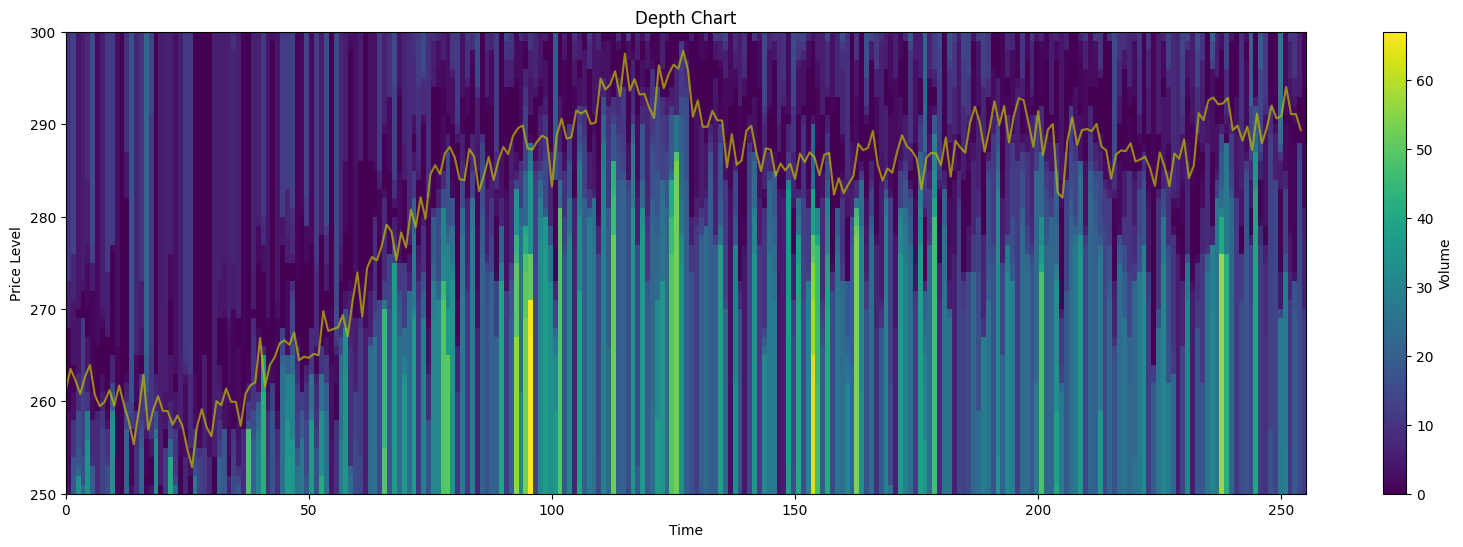

In [9]:
plt.figure(figsize = (20,6))
extent = [0 , len(df_resampled), min_price , max_price]
plt.imshow(depth_chart.T, cmap='viridis', origin='lower', aspect='auto', extent = extent)
# Adding labels and title
plt.ylabel('Price Level')
plt.xlabel('Time')
plt.title('Depth Chart')
plt.plot(np.arange(len(df_resampled)), df_resampled["P x V"] / df_resampled["Volume"], 'y', alpha = 0.7)
# Display the plot
plt.colorbar(label='Volume')
plt.show()